## KMean Clustering

**KMean Clustering** is a simple yet effective unsupervised learning algorithm. **KMean Clustering** algorithm is as follows:

1. Randomly pick *k* centroids from the data as initial cluster centers.
2. Assign each data point to the nearest centroid, $\mu^{(j)}, j \in \{1,..,k\}$.
3. Recalculate the centroids to the center of the data points that were assigned to it.
4. Repeat above two steps until the cluster assignments do not change within a tolerance.

**KMean Clustering** solution can be dependent upon initial guess and many times **KMean** might not converge to a global solution. 

There is a variant of **KMean** called **KMean++** this can greatly improve the clustering results through more clever seeding of the cluster centers. **KMean++** tries to put initial centroids as far away from each other as possible. In the notebook below we will show **KMean** with and without **KMean++** initialization.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Lets make some test data using make_blobs function of Sklearn

In [2]:
from sklearn.datasets import make_blobs
(X,y) = make_blobs(n_samples=10000, 
               n_features=2,
                centers=[[0,0],[5,1],[-3,3],[5,5]])

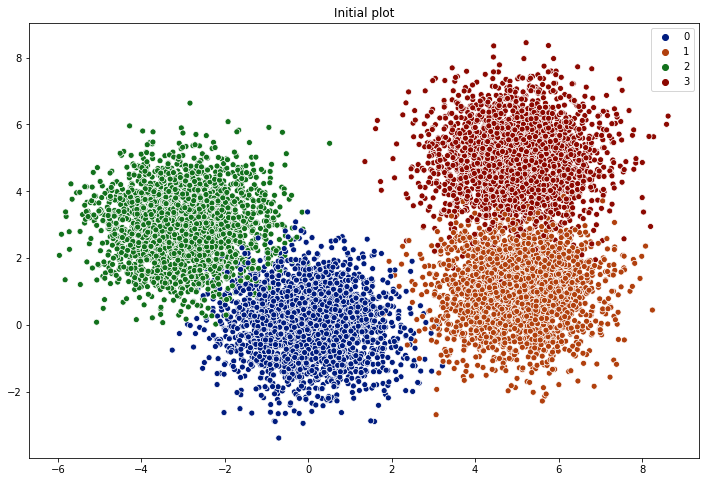

In [3]:
plt.figure(figsize=(12,8))
plt.title('Initial plot')
sns.scatterplot(X[:,0], X[:,1], hue=y, palette='dark')

In [4]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=4, init='random')
y_km = kmean.fit_predict(X)
print(f"Inertia {kmean.inertia_: .3f}")

Inertia  19491.920


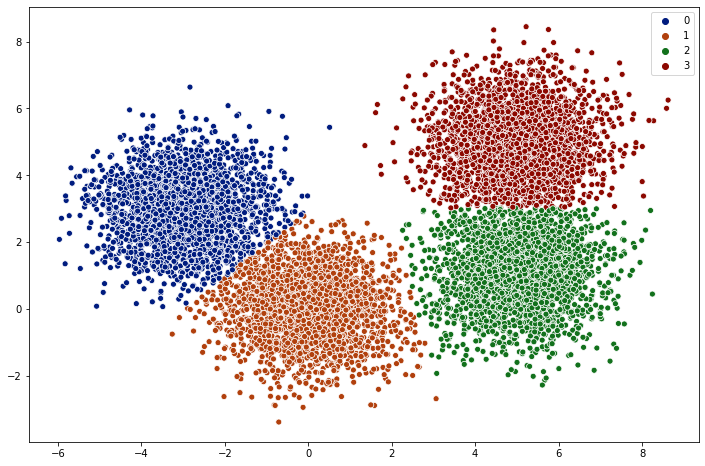

In [5]:
plt.figure(figsize=(12,8))
sns.scatterplot(X[:,0], X[:,1], hue=y_km, palette='dark')

We can see from above **KMean** seems to have guessed the clusters correctly. Lets try again with init = k-means++.

In [6]:
kmean = KMeans(n_clusters=4, init='k-means++')
y_km = kmean.fit_predict(X)
print(f"Inertia {kmean.inertia_: .3f}")

Inertia  19491.826


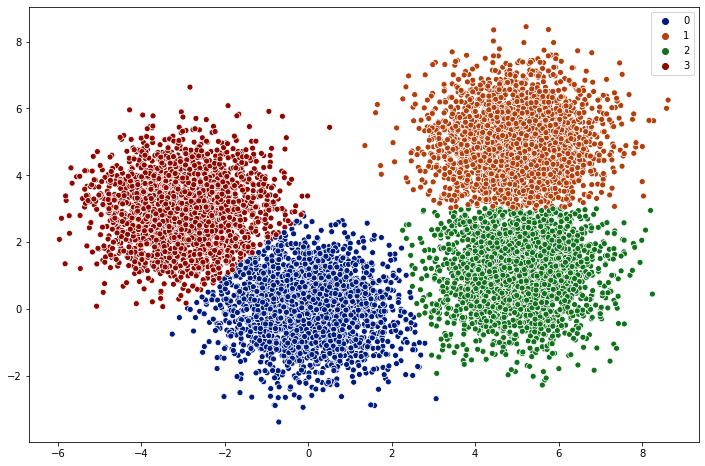

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(X[:,0], X[:,1], hue=y_km, palette='dark')

We can see in the above case both **random** initialization and **KMean++** give same results. Now lets implement **KMean** from scratch.

In [8]:
class KMean:
    
    def __init__(self, n_clusters, max_iter=100):
        self.n_clusters_ = n_clusters
        self.max_iter_ = max_iter
        
    def fit_predict(self, X):
        #Randomly initialize values to n_clusters
        lst = np.arange(0,X.shape[0])
        c = np.random.choice(lst, size=self.n_clusters_, replace=False)
        self.centers_ = X[c]
        for n in range(self.max_iter_):
            #Calculate distance of each point from the centers
            q = list()
            for c in self.centers_:
                q.append(np.sum(np.square(X-c), axis=1))
            
            q = np.array(q).T
            self.ndx_ = np.argmin(q, axis=1)
            for (e, c) in enumerate(self.centers_):
                cc = X[self.ndx_==e].mean(axis=0)
                self.centers_[e] = cc
        return self.ndx_
                
    def predict(self, X):
        return self.ndx_
        
                

In [9]:
km = KMean(4)
y_km = km.fit_predict(X)

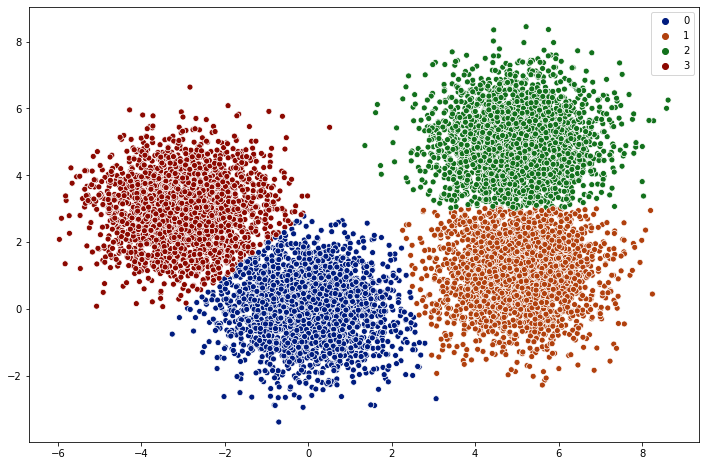

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(X[:,0], X[:,1], hue=y_km, palette='dark')

We can see from above plot that our implementation of **KMeans** gives very similar result to **sklearn** and detects the correct cluster centers.